In [1]:
import numpy as np
import pandas as pd
import scipy.stats as st
import networkx as nx
import scipy as sp 
import matplotlib.pyplot as plt
plt.rcParams["figure.dpi"] = 300
import seaborn as sns
import os
import hickle

import sys
sys.path.append(os.path.join(os.getcwd(), "lib"))

import vaccination as vacc
import models
import transnet
import data_loader as dl
import make_network as mn

%matplotlib inline

In [2]:
school_data = dl.load_schools_data()
data_net = mn.build_network_alinks()
vacc_dict_samples = vacc.vacc_sample_dict()
nodelist_dt = np.intersect1d(np.intersect1d(data_net.nodes(), 
                          list(map(str, vacc_dict_samples['sample 0'].keys()))), school_data.BRIN)



vacc_dict_pc4 = vacc.vacc_pc4_dict(nodelist_dt, vacc_dict_samples['sample 0'], n=20., by='school')





In [3]:
vacc_dict_yso = [transnet.create_yso_dict(y, vacc_dict_samples['sample 0'], 
                                         school_data, years_in_pri=8., 
                                         years_in_sec=5., post_outbreak=0.98) for y in range(1, 14, 1)]

In [4]:
adj_mat_dt = nx.adjacency_matrix(data_net, weight='weight', 
                                 nodelist=nodelist_dt).toarray()

In [5]:
adj_mat_spa_all, nodelist_spa, dist_mat = mn.make_random_adjmat(data_net.subgraph(nodelist_dt), 
                                                            school_data, school_data, p=0.65, rule='gauss', 
                                                            sec_pri_only=False)
adj_mat_spa_all = np.nan_to_num(adj_mat_spa_all,0)
adj_mat_spa_all = adj_mat_spa_all*transnet.adj_mat_dt.sum()/adj_mat_spa_all.sum()

8916


In [25]:
for s in range(100):
    print 'run ', s
    transmat = sp.sparse.csc_matrix(transnet.create_transmat_from_adjmat(adj_mat_spa_all, nodelist=nodelist_spa,vacc_dict=transnet.vacc_dict_samples['sample ' + str(s)]))
    hickle.dump(transmat, 'spatialres/transmats/transmat_' + str(s) + '.hkl')

run  0
run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
run  10
run  11
run  12
run  13
run  14
run  15
run  16
run  17
run  18
run  19
run  20
run  21
run  22
run  23
run  24
run  25
run  26
run  27
run  28
run  29
run  30
run  31
run  32
run  33
run  34
run  35
run  36
run  37
run  38
run  39
run  40
run  41
run  42
run  43
run  44
run  45
run  46
run  47
run  48
run  49
run  50
run  51
run  52
run  53
run  54
run  55
run  56
run  57
run  58
run  59
run  60
run  61
run  62
run  63
run  64
run  65
run  66
run  67
run  68
run  69
run  70
run  71
run  72
run  73
run  74
run  75
run  76
run  77
run  78
run  79
run  80
run  81
run  82
run  83
run  84
run  85
run  86
run  87
run  88
run  89
run  90
run  91
run  92
run  93
run  94
run  95
run  96
run  97
run  98
run  99


In [56]:
for s in range(100):
    print 'run ', s
    transmat = sp.sparse.csc_matrix(transnet.create_transmat_from_adjmat(adj_mat_dt, nodelist=nodelist_dt,vacc_dict=transnet.vacc_dict_samples['sample ' + str(s)]))
    hickle.dump(transmat, 'netres/transmats/transmat_' + str(s) + '.hkl')

run  0
run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
run  10
run  11
run  12
run  13
run  14
run  15
run  16
run  17
run  18
run  19
run  20
run  21
run  22
run  23
run  24
run  25
run  26
run  27
run  28
run  29
run  30
run  31
run  32
run  33
run  34
run  35
run  36
run  37
run  38
run  39
run  40
run  41
run  42
run  43
run  44
run  45
run  46
run  47
run  48
run  49
run  50
run  51
run  52
run  53
run  54
run  55
run  56
run  57
run  58
run  59
run  60
run  61
run  62
run  63
run  64
run  65
run  66
run  67
run  68
run  69
run  70
run  71
run  72
run  73
run  74
run  75
run  76
run  77
run  78
run  79
run  80
run  81
run  82
run  83
run  84
run  85
run  86
run  87
run  88
run  89
run  90
run  91
run  92
run  93
run  94
run  95
run  96
run  97
run  98
run  99


In [27]:
for r in range(100):
    print 'vacc ', r
    for run in range(10): 
        #print 'run ', run
        tm = hickle.load('spatialres/transmats/transmat_' + str(r) + '.hkl')
        tm = tm.todense()
        obnet = sp.sparse.csc_matrix(tm > np.random.random(tm.shape))
        hickle.dump(obnet, 'spatialres/outbreaks/outbreak_' + str(r) + '_'  + str(run) + '.hkl')

vacc  0
vacc  1
vacc  2
vacc  3
vacc  4
vacc  5
vacc  6
vacc  7
vacc  8
vacc  9
vacc  10
vacc  11
vacc  12
vacc  13
vacc  14
vacc  15
vacc  16
vacc  17
vacc  18
vacc  19
vacc  20
vacc  21
vacc  22
vacc  23
vacc  24
vacc  25
vacc  26
vacc  27
vacc  28
vacc  29
vacc  30
vacc  31
vacc  32
vacc  33
vacc  34
vacc  35
vacc  36
vacc  37
vacc  38
vacc  39
vacc  40
vacc  41
vacc  42
vacc  43
vacc  44
vacc  45
vacc  46
vacc  47
vacc  48
vacc  49
vacc  50
vacc  51
vacc  52
vacc  53
vacc  54
vacc  55
vacc  56
vacc  57
vacc  58
vacc  59
vacc  60
vacc  61
vacc  62
vacc  63
vacc  64
vacc  65
vacc  66
vacc  67
vacc  68
vacc  69
vacc  70
vacc  71
vacc  72
vacc  73
vacc  74
vacc  75
vacc  76
vacc  77
vacc  78
vacc  79
vacc  80
vacc  81
vacc  82
vacc  83
vacc  84
vacc  85
vacc  86
vacc  87
vacc  88
vacc  89
vacc  90
vacc  91
vacc  92
vacc  93
vacc  94
vacc  95
vacc  96
vacc  97
vacc  98
vacc  99


In [57]:
for r in range(100):
    print 'vacc ', r
    for run in range(10): 
        #print 'run ', run
        tm = hickle.load('netres/transmats/transmat_' + str(r) + '.hkl')
        tm = tm.todense()
        obnet = sp.sparse.csc_matrix(tm > np.random.random(tm.shape))
        hickle.dump(obnet, 'netres/outbreaks/outbreak_' + str(r) + '_'  + str(run) + '.hkl')

vacc  0
vacc  1
vacc  2
vacc  3
vacc  4
vacc  5
vacc  6
vacc  7
vacc  8
vacc  9
vacc  10
vacc  11
vacc  12
vacc  13
vacc  14
vacc  15
vacc  16
vacc  17
vacc  18
vacc  19
vacc  20
vacc  21
vacc  22
vacc  23
vacc  24
vacc  25
vacc  26
vacc  27
vacc  28
vacc  29
vacc  30
vacc  31
vacc  32
vacc  33
vacc  34
vacc  35
vacc  36
vacc  37
vacc  38
vacc  39
vacc  40
vacc  41
vacc  42
vacc  43
vacc  44
vacc  45
vacc  46
vacc  47
vacc  48
vacc  49
vacc  50
vacc  51
vacc  52
vacc  53
vacc  54
vacc  55
vacc  56
vacc  57
vacc  58
vacc  59
vacc  60
vacc  61
vacc  62
vacc  63
vacc  64
vacc  65
vacc  66
vacc  67
vacc  68
vacc  69
vacc  70
vacc  71
vacc  72
vacc  73
vacc  74
vacc  75
vacc  76
vacc  77
vacc  78
vacc  79
vacc  80
vacc  81
vacc  82
vacc  83
vacc  84
vacc  85
vacc  86
vacc  87
vacc  88
vacc  89
vacc  90
vacc  91
vacc  92
vacc  93
vacc  94
vacc  95
vacc  96
vacc  97
vacc  98
vacc  99


In [10]:
def save_trees(folder, nodelist, no_vs=100, no_os=10):
    seeds = []
    all_keeps = []
    for v in range(no_vs):
        print v
        for o in range(no_os): 
            #print o
            tm = hickle.load(folder + '/outbreaks/outbreak_' + str(v) + '_' + str(o) +'.hkl').todense()*1.0
            obnet = transnet.create_network_from_transmat(tm,nodelist=nodelist)
            outdeg = obnet.out_degree()
            indeg = obnet.in_degree()

            all_outcond = [n for n in obnet.nodes() if outdeg[n] > 0]
            all_incond = [n for n in obnet.nodes() if indeg[n] > 0]
            to_keep = list(set(all_outcond + all_incond))


            for k in to_keep:
                con_list = []
                nod_list = [k]
                while len(nod_list) > 0:

                    con_list.extend(nod_list)
                    nod_list = list(np.hstack([obnet.successors(n) for n in nod_list]))
                    nod_list = [n for n in nod_list if n not in con_list]
                np.save(folder + '/succ/' + k + '_con_' + str(v) + '_' + str(o) + '.npy', np.array(list(set(con_list))))
                #i+=1


In [8]:
def save_preds(folder, nodelist, no_vs=100, no_os=10):
    seeds = []
    all_keeps = []
    for v in range(no_vs):
        print v
        for o in range(no_os): 
            #print o
            tm = hickle.load(folder + '/outbreaks/outbreak_' + str(v) + '_' + str(o) +'.hkl').todense()*1.0
            obnet = transnet.create_network_from_transmat(tm,nodelist=nodelist)
            outdeg = obnet.out_degree()
            indeg = obnet.in_degree()

            all_outcond = [n for n in obnet.nodes() if outdeg[n] > 0]
            all_incond = [n for n in obnet.nodes() if indeg[n] > 0]
            to_keep = list(set(all_outcond + all_incond))


            for k in to_keep:
                con_list = []
                nod_list = [k]
                while len(nod_list) > 0:

                    con_list.extend(nod_list)
                    nod_list = list(np.hstack([obnet.predecessors(n) for n in nod_list]))
                    nod_list = [n for n in nod_list if n not in con_list]
                np.save(folder + '/pred/' + k + '_con_' + str(v) + '_' + str(o) + '.npy', np.array(list(set(con_list))))
                #i+=1


In [11]:
save_trees('netres', nodelist_dt, 1, 1)

0


In [12]:
save_preds('netres', nodelist_dt)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [32]:
save_trees('spatialres', nodelist_spa)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [18]:
save_preds('spatialres', nodelist_spa)

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26
27
28
29
30
31
32
33
34
35
36
37
38
39
40
41
42
43
44
45
46
47
48
49
50
51
52
53
54
55
56
57
58
59
60
61
62
63
64
65
66
67
68
69
70
71
72
73
74
75
76
77
78
79
80
81
82
83
84
85
86
87
88
89
90
91
92
93
94
95
96
97
98
99


In [ ]:
transnet.create_transmat_from_adjmat(adj_mat_dt, nodelist=nodelist_dt,vacc_dict=transnet.vacc_dict_samples['sample ' + str(s)])

In [61]:
transmat = sp.sparse.csc_matrix(transnet.create_transmat_from_adjmat(adj_mat_spa_all, nodelist=nodelist_spa,vacc_dict=vacc_dict_pc4))
hickle.dump(transmat, 'spatialrespc4/transmats/transmat_' + str(0) + '.hkl')

In [63]:
transmat = sp.sparse.csc_matrix(transnet.create_transmat_from_adjmat(adj_mat_dt, nodelist=nodelist_dt,vacc_dict=vacc_dict_pc4))
hickle.dump(transmat, 'netrespc4/transmats/transmat_' + str(0) + '.hkl')

In [66]:
tm = hickle.load('spatialrespc4/transmats/transmat_' + str(0) + '.hkl')
tm = tm.todense()

for run in range(100): 
    print 'run ', run
    obnet = sp.sparse.csc_matrix(tm > np.random.random(tm.shape))
    hickle.dump(obnet, 'spatialrespc4/outbreaks/outbreak_' + str(0) + '_'  + str(run) + '.hkl')

run  0
run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
run  10
run  11
run  12
run  13
run  14
run  15
run  16
run  17
run  18
run  19
run  20
run  21
run  22
run  23
run  24
run  25
run  26
run  27
run  28
run  29
run  30
run  31
run  32
run  33
run  34
run  35
run  36
run  37
run  38
run  39
run  40
run  41
run  42
run  43
run  44
run  45
run  46
run  47
run  48
run  49
run  50
run  51
run  52
run  53
run  54
run  55
run  56
run  57
run  58
run  59
run  60
run  61
run  62
run  63
run  64
run  65
run  66
run  67
run  68
run  69
run  70
run  71
run  72
run  73
run  74
run  75
run  76
run  77
run  78
run  79
run  80
run  81
run  82
run  83
run  84
run  85
run  86
run  87
run  88
run  89
run  90
run  91
run  92
run  93
run  94
run  95
run  96
run  97
run  98
run  99


In [67]:
tm = hickle.load('netrespc4/transmats/transmat_' + str(0) + '.hkl')
tm = tm.todense()

for run in range(100): 
    print 'run ', run
    obnet = sp.sparse.csc_matrix(tm > np.random.random(tm.shape))
    hickle.dump(obnet, 'netrespc4/outbreaks/outbreak_' + str(0) + '_'  + str(run) + '.hkl')

run  0
run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
run  10
run  11
run  12
run  13
run  14
run  15
run  16
run  17
run  18
run  19
run  20
run  21
run  22
run  23
run  24
run  25
run  26
run  27
run  28
run  29
run  30
run  31
run  32
run  33
run  34
run  35
run  36
run  37
run  38
run  39
run  40
run  41
run  42
run  43
run  44
run  45
run  46
run  47
run  48
run  49
run  50
run  51
run  52
run  53
run  54
run  55
run  56
run  57
run  58
run  59
run  60
run  61
run  62
run  63
run  64
run  65
run  66
run  67
run  68
run  69
run  70
run  71
run  72
run  73
run  74
run  75
run  76
run  77
run  78
run  79
run  80
run  81
run  82
run  83
run  84
run  85
run  86
run  87
run  88
run  89
run  90
run  91
run  92
run  93
run  94
run  95
run  96
run  97
run  98
run  99


In [71]:
save_trees('netrespc4', nodelist_dt, no_vs=1, no_os=100)

0


In [72]:
save_trees('spatialrespc4', nodelist_dt, no_vs=1, no_os=100)

0


In [76]:
for y, vacc_dict in enumerate(vacc_dict_yso):
    transmat = sp.sparse.csc_matrix(transnet.create_transmat_from_adjmat(adj_mat_dt, nodelist=nodelist_dt,vacc_dict=vacc_dict))
    hickle.dump(transmat, 'netresyso/transmats/transmat_' + str(y) + '.hkl')

In [84]:
for y in range(0,len(vacc_dict_yso),2):
    tm = hickle.load('spatialrespc4/transmats/transmat_' + str(y) + '.hkl')
    tm = tm.todense()
    for run in range(100): 
        print 'run ', run
        obnet = sp.sparse.csc_matrix(tm > np.random.random(tm.shape))
        hickle.dump(obnet, 'spatialrespc4/outbreaks/outbreak_' + str(y) + '_'  + str(run) + '.hkl')

run  0
run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
run  10
run  11
run  12
run  13
run  14
run  15
run  16
run  17
run  18
run  19
run  20
run  21
run  22
run  23
run  24
run  25
run  26
run  27
run  28
run  29
run  30
run  31
run  32
run  33
run  34
run  35
run  36
run  37
run  38
run  39
run  40
run  41
run  42
run  43
run  44
run  45
run  46
run  47
run  48
run  49
run  50
run  51
run  52
run  53
run  54
run  55
run  56
run  57
run  58
run  59
run  60
run  61
run  62
run  63
run  64
run  65
run  66
run  67
run  68
run  69
run  70
run  71
run  72
run  73
run  74
run  75
run  76
run  77
run  78
run  79
run  80
run  81
run  82
run  83
run  84
run  85
run  86
run  87
run  88
run  89
run  90
run  91
run  92
run  93
run  94
run  95
run  96
run  97
run  98
run  99


IOError: Unable to open file (Unable to open file: name = 'spatialrespc4/transmats/transmat_2.hkl', errno = 2, error message = 'no such file or directory', flags = 0, o_flags = 0)

In [85]:
for y, vacc_dict in enumerate(vacc_dict_yso):
    tm = hickle.load('netresyso/transmats/transmat_' + str(y) + '.hkl')
    tm = tm.todense()
    for run in range(100): 
        print 'run ', run
        obnet = sp.sparse.csc_matrix(tm > np.random.random(tm.shape))
        hickle.dump(obnet, 'netresyso/outbreaks/outbreak_' + str(y) + '_'  + str(run) + '.hkl')

run  0
run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
run  10
run  11
run  12
run  13
run  14
run  15
run  16
run  17
run  18
run  19
run  20
run  21
run  22
run  23
run  24
run  25
run  26
run  27
run  28
run  29
run  30
run  31
run  32
run  33
run  34
run  35
run  36
run  37
run  38
run  39
run  40
run  41
run  42
run  43
run  44
run  45
run  46
run  47
run  48
run  49
run  50
run  51
run  52
run  53
run  54
run  55
run  56
run  57
run  58
run  59
run  60
run  61
run  62
run  63
run  64
run  65
run  66
run  67
run  68
run  69
run  70
run  71
run  72
run  73
run  74
run  75
run  76
run  77
run  78
run  79
run  80
run  81
run  82
run  83
run  84
run  85
run  86
run  87
run  88
run  89
run  90
run  91
run  92
run  93
run  94
run  95
run  96
run  97
run  98
run  99
run  0
run  1
run  2
run  3
run  4
run  5
run  6
run  7
run  8
run  9
run  10
run  11
run  12
run  13
run  14
run  15
run  16
run  17
run  18
run  19
run  20
run  21
run  22
run  23
run  24
run  25
run  26
run 

In [86]:
save_trees('netresyso', nodelist_dt, no_vs=len(vacc_dict_yso), no_os=100)

0
1
2
3
4
5
6
7
8
9
10
11
12


In [71]:
full_vacc = pd.DataFrame.from_dict(vacc_dict_yso[12], orient='index', columns=['vacc'])
samp_vacc = pd.DataFrame.from_dict(vacc_dict_samples['sample 0'], orient='index', columns=['vacc'])

In [102]:
max(full_vacc[nomatch].vacc - samp_vacc.loc[full_vacc.index][nomatch].vacc)

1.1102230246251565e-16

In [87]:
nomatch = np.array(full_vacc.loc[full_vacc.index].vacc) != np.array(samp_vacc.loc[full_vacc.index].vacc)

/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


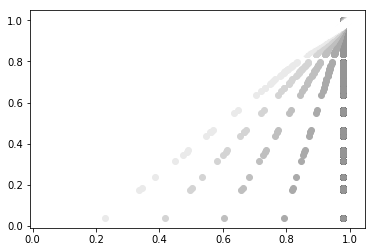

In [68]:
for i in range(13):
    plt.plot(pd.DataFrame.from_dict(vacc_dict_yso[i], orient='index', columns=['vacc']).loc[sec_brin].vacc, samp_vacc.loc[sec_brin].vacc, 'o', color=str(i/12.))



/Users/LAPT0084/anaconda/lib/python2.7/site-packages/ipykernel/__main__.py:2: FutureWarning: 
Passing list-likes to .loc or [] with any missing label will raise
KeyError in the future, you can use .reindex() as an alternative.

See the documentation here:
https://pandas.pydata.org/pandas-docs/stable/indexing.html#deprecate-loc-reindex-listlike
  from ipykernel import kernelapp as app


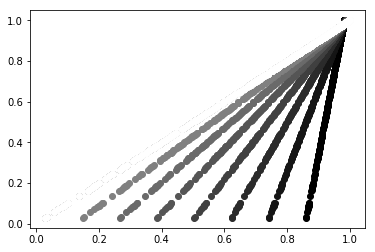

In [69]:
for i in range(13):
    plt.plot(pd.DataFrame.from_dict(vacc_dict_yso[i], orient='index', columns=['vacc']).loc[pri_brin].vacc, samp_vacc.loc[pri_brin].vacc, 'o', color=str(i/12.))

In [57]:
pri_brin = school_data.query('kind == "pri"').BRIN
sec_brin = school_data.query('kind == "sec"').BRIN
